In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
from fbprophet import Prophet
import matplotlib.pyplot as plt
sample=pd.read_csv('./BrentOilPrices.csv')

In [2]:
sample.head()

,ds,y
0,"May 20, 1987",18.63
1,"May 21, 1987",18.45
2,"May 22, 1987",18.55
3,"May 25, 1987",18.60
4,"May 26, 1987",18.63


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8216 entries, 0 to 8215
Data columns (total 2 columns):
ds    8216 non-null object
y     8216 non-null float64
dtypes: float64(1), object(1)
memory usage: 128.5+ KB


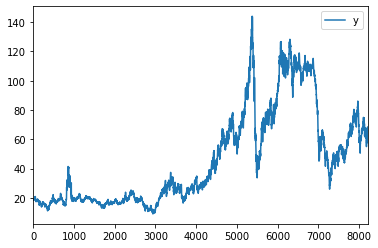

In [4]:
sample.plot()

In [5]:
m = Prophet()
m.fit(sample)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
8576,2020-09-25
8577,2020-09-26
8578,2020-09-27
8579,2020-09-28
8580,2020-09-29


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8576,2020-09-25,38.346152,22.532541,55.250780
8577,2020-09-26,39.487641,24.805996,55.375719
8578,2020-09-27,39.427196,24.295786,55.675746
8579,2020-09-28,38.196383,22.327202,53.439436
8580,2020-09-29,38.026671,21.980359,53.166988


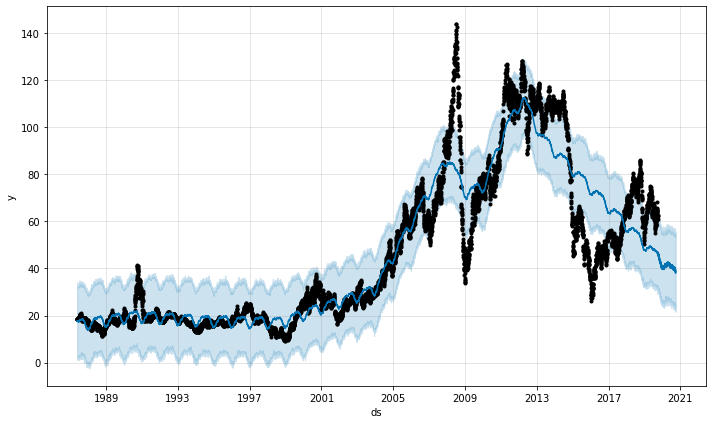

In [8]:
fig1 = m.plot(forecast)

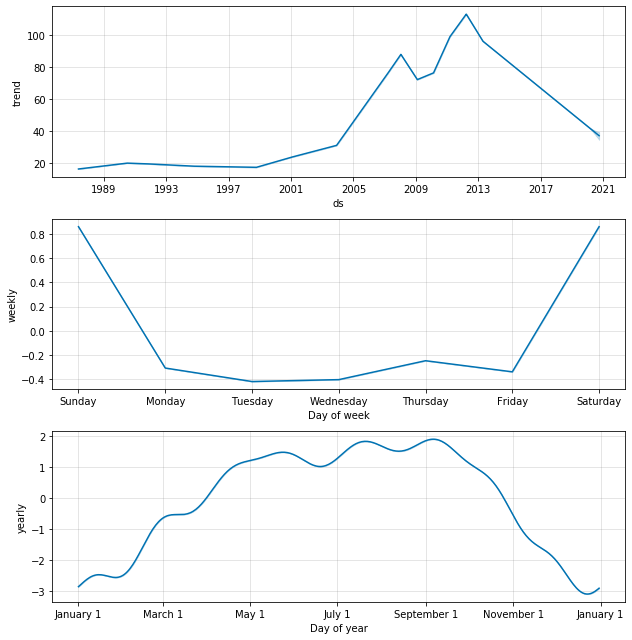

In [9]:
fig2 = m.plot_components(forecast)
